### Problem Statement
Your client is a retail banking institution. Term deposits are a major source
of income for a bank.
A term deposit is a cash investment held at a financial institution. Your
money is invested for an agreed rate of interest over a fixed amount of
time, or term.
The bank has various outreach plans to sell term deposits to their
customers such as email marketing, advertisements, telephonic marketing
and digital marketing.
Telephonic marketing campaigns still remain one of the most effective way
to reach out to people. However, they require huge investment as large call
centers are hired to actually execute these campaigns. Hence, it is crucial
to identify the customers most likely to convert beforehand so that they can
be specifically targeted via call.
You are provided with the client data such as : age of the client, their job
type, their marital status, etc. Along with the client data, you are also
provided with the information of the call such as the duration of the call, day
and month of the call, etc. Given this information, your task is to predict if
the client will subscribe to term deposit.

### Modules and dataset

In [ ]:
# Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Appliance energy dataset
df = pd.read_csv('/content/drive/MyDrive/Intershala Certificate/train.csv')

In [ ]:
x_test = pd.read_csv('/content/drive/MyDrive/Intershala Certificate/test.csv')

In [ ]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [ ]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [ ]:
df.shape

(31647, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [ ]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Missing values

In [ ]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

#### Univariate Analysis

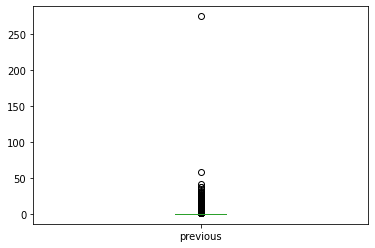

In [ ]:
df['previous'].plot.box()

In [ ]:
df = df[df['previous']<100]

In [ ]:
df['job'].value_counts()

blue-collar      6842
management       6638
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

In [ ]:
df['marital'].value_counts()

married     19094
single       8922
divorced     3630
Name: marital, dtype: int64

In [ ]:
df['education'].value_counts()

secondary    16224
tertiary      9300
primary       4808
unknown       1314
Name: education, dtype: int64

In [ ]:
df['default'].value_counts()

no     31061
yes      585
Name: default, dtype: int64

In [ ]:
df['housing'].value_counts()

yes    17583
no     14063
Name: housing, dtype: int64

In [ ]:
df['loan'].value_counts()

no     26515
yes     5131
Name: loan, dtype: int64

In [ ]:
df['contact'].value_counts()

cellular     20422
unknown       9177
telephone     2047
Name: contact, dtype: int64

In [ ]:
df['month'].value_counts()

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1826
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

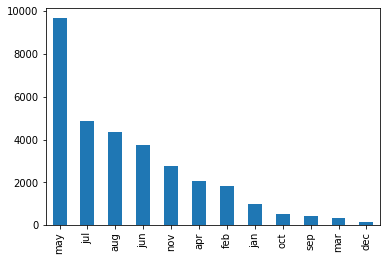

In [ ]:
df['month'].value_counts().plot.bar()

In [ ]:
df['poutcome'].value_counts()

unknown    25929
failure     3362
other       1287
success     1068
Name: poutcome, dtype: int64

In [ ]:
df['subscribed'].value_counts()

no     27931
yes     3715
Name: subscribed, dtype: int64

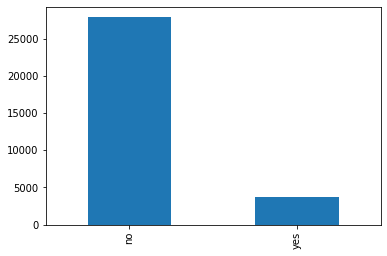

In [ ]:
df['subscribed'].value_counts().plot.bar()

#### Bivariate Analysis

subscribed  no  yes
age                
18           3    5
19          15    7
20          25   14
21          33   15
22          61   25
..          ..  ...
90           0    1
92           0    1
93           0    1
94           1    0
95           0    1

[76 rows x 2 columns]


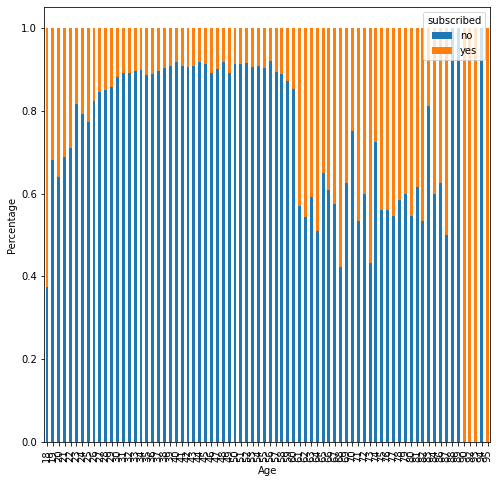

In [ ]:
print(pd.crosstab(df['age'],df['subscribed']))

age=pd.crosstab(df['age'],df['subscribed'])
age.div(age.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.rcParams['figure.figsize'] = (20, 20)

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5715  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

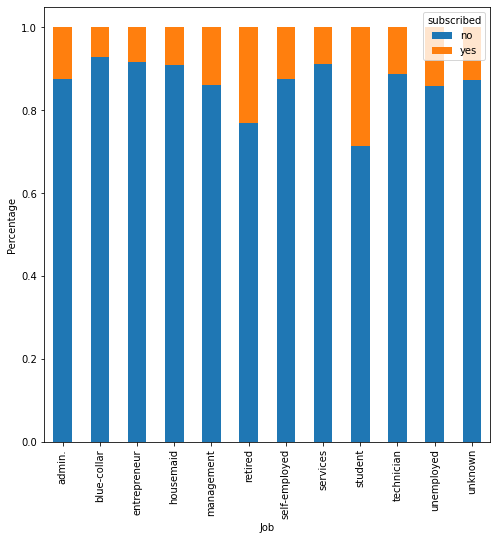

In [ ]:
print(pd.crosstab(df['job'],df['subscribed']))

job=pd.crosstab(df['job'],df['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')

In [ ]:
defaulted = df[df['default']=='yes']

In [ ]:
single = defaulted[defaulted['marital']=='single']

In [ ]:
job = single[single['job']=='unemployed']

In [ ]:
job

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
9634,18002,44,unemployed,single,primary,yes,-4,no,yes,cellular,30,jul,788,2,-1,0,unknown,yes
16320,2280,28,unemployed,single,secondary,yes,-353,yes,no,unknown,12,may,89,3,-1,0,unknown,no
21277,25551,35,unemployed,single,secondary,yes,-126,no,no,cellular,19,nov,168,1,-1,0,unknown,no
21492,30841,35,unemployed,single,primary,yes,-84,no,no,cellular,9,feb,19,11,-1,0,unknown,no
26444,6580,30,unemployed,single,secondary,yes,-770,yes,no,unknown,28,may,87,1,-1,0,unknown,no


In [ ]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


### Transforming categorical data for x

In [ ]:
x = df.drop('subscribed', axis=1)

In [ ]:
x.drop('ID', axis=1, inplace=True)

In [ ]:
x=pd.get_dummies(x)

In [ ]:
x

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,56,1933,19,44,2,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,31,3,20,91,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,27,891,18,240,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,57,3287,22,867,1,84,3,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,31,119,4,380,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,0,12,116,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
31643,53,380,5,438,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
31644,32,312,7,37,3,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
31645,57,225,15,22,7,337,12,0,0,0,...,0,0,1,0,0,0,1,0,0,0


### Transforming categorical data for y

In [ ]:
def transform_status(X):
    if X == 'yes':
        return 1
    elif X == 'no':
        return 0
    else:
        return -1
    
def process_data(df):
    df['subscribed'] = df['subscribed'].apply(transform_status)
    return df

df = process_data(df)

In [ ]:
y = df['subscribed']

In [ ]:
y

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31646, dtype: int64

In [ ]:
# perfoming train-test split
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, true_p = train_test_split(x,y, test_size=0.2, random_state=5)

### Transforming categorical data for x_test

In [ ]:
x_test.drop('ID', axis=1, inplace=True)

In [ ]:
x_test = pd.get_dummies(x_test)

In [ ]:
x_test

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,32,118,15,20,6,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,78,2787,1,372,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,31,144,16,676,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,57,3777,13,65,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,45,-705,3,111,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,45,28,148,4,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13560,54,2281,20,158,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
13561,35,285,29,136,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13562,29,464,9,208,2,91,3,1,0,0,...,0,0,0,1,0,0,0,0,1,0


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model1=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000, n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model1.fit(x,y)

LogisticRegression(max_iter=1000, penalty='l1', random_state=0,
                   solver='liblinear')

In [ ]:
pred1=model1.predict(x_test)

In [ ]:
model1.score(x,y)

0.9005877520065727

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model2 = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=5, min_samples_leaf=5)

In [ ]:
# fitting the decision tree model
model2.fit(x,y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [ ]:
# making prediction on the validation set
pred2 = model2.predict(x_test)

In [ ]:
model2.score(x,y)

0.9044744991468116

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model3 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)
model3.fit(x, y)

RandomForestClassifier(n_estimators=10, n_jobs=2, random_state=0)

In [ ]:
# making prediction on the validation set
pred3 = model3.predict(x_test)

In [ ]:
model3.score(x,y)

0.992668899702964

### Conclusion - Logistic Regression is the best fit model for predicting whether the client will subscribe the term deposit or not.